# 時系列解析

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Chapter1-1 時系列データ
対象のある側面を特定の時間感覚で観測した結果の集まり
<b>通常の時系列データは観測者によって観測の時間間隔が設定されます</b>

## Chapter1-2 時系列データと確率分布
### 時系列データの収集
観測対照ないしその属性が連続時間上で変化すると仮定し、それらを事前に決めた時間間隔で記録する作業。
時系列文政の主な目的は観測対象のモデル化、時間を引数とした関数を定義すること。

## Chapter1-3 株式収益率の時系列データ
統計学では同一の確率分布から得られた互いに独立な標本の集まりと見做しているが、これはデータはある１つの確率分布から無関係に複数回標本を抽出した時の標本の集団→「データは独立同一分布に従う」
データが独立同一分布すると仮定すると近似精度の悪いモデルとなるのが時系列データ。

## Chapter1-4 時系列分析に向けて
時系列モデルを考慮する点は以下
- 当日の値が過去のデータに依存する
- ばらつきが日々変化する
<p>これらは確率分布が時間変化するという仮定を置くと説明可能</p>


# Chapter2-1 時系列データを観察する

In [52]:
yamaha = pd.read_csv('yamaha.csv')
ita = pd.read_csv('itagarasu.csv')
pola = pd.read_csv('pola.csv')
takeda = pd.read_csv('takeda.csv')
yamaha['time'] = pd.to_datetime(yamaha.date)
ita['time'] = pd.to_datetime(ita.date)
pola['time'] = pd.to_datetime(pola.date)
takeda['time'] = pd.to_datetime(takeda.date)

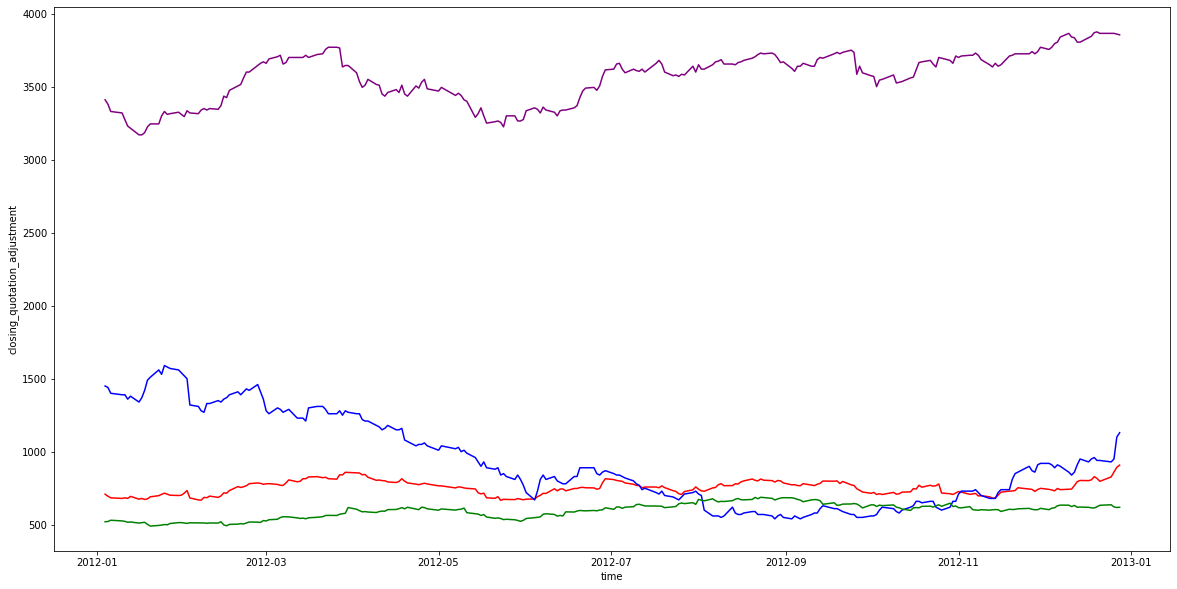

In [62]:
# そのままプロット
plt.figure(figsize=(20,10))
sns.lineplot(x='time', y='closing_quotation_adjustment', data=yamaha, color='red')
sns.lineplot(x='time', y='closing_quotation_adjustment', data=ita, color='blue')
sns.lineplot(x='time', y='closing_quotation_adjustment', data=pola, color='green')
sns.lineplot(x='time', y='closing_quotation_adjustment', data=takeda, color='purple')

In [55]:
# 標準化
def get_std(data):
    return (data.closing_quotation_adjustment - data.closing_quotation_adjustment.mean()) / data.closing_quotation_adjustment.std()
yamaha['closing_quotation_adjustment_standardization'] = get_std(yamaha)
pola['closing_quotation_adjustment_standardization'] = get_std(pola)
ita['closing_quotation_adjustment_standardization'] = get_std(ita)
takeda['closing_quotation_adjustment_standardization'] = get_std(takeda)


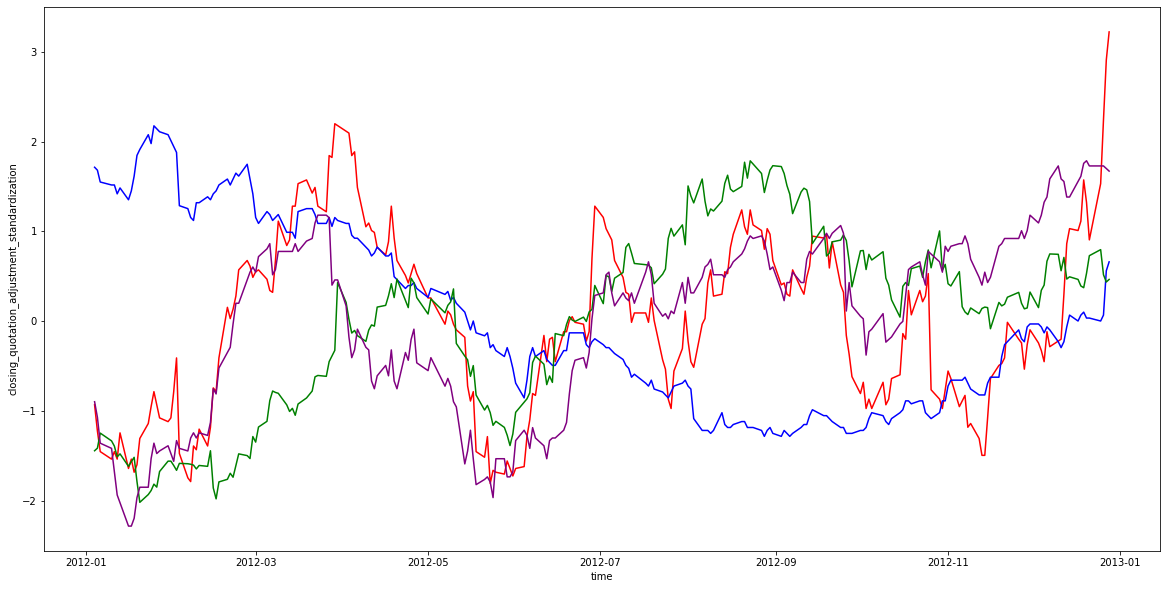

In [61]:
# 標準化プロット
# 標準化すると比較しやすくなるが、分析期間を変更するたびに標準化しなければならないため不便である
plt.figure(figsize=(20,10))
sns.lineplot(x='time', y='closing_quotation_adjustment_standardization', data=yamaha, color='red')
sns.lineplot(x='time', y='closing_quotation_adjustment_standardization', data=ita, color='blue')
sns.lineplot(x='time', y='closing_quotation_adjustment_standardization', data=pola, color='green')
sns.lineplot(x='time', y='closing_quotation_adjustment_standardization', data=takeda, color='purple')

In [66]:
# 対数差収益率を使う
def get_diff_log(data):
    return np.log(data.closing_quotation_adjustment) - np.log(data.shift(1).closing_quotation_adjustment)
yamaha['closing_quotation_adjustment_logdiff'] = get_diff_log(yamaha)
pola['closing_quotation_adjustment_logdiff'] = get_diff_log(pola)
ita['closing_quotation_adjustment_logdiff'] = get_diff_log(ita)
takeda['closing_quotation_adjustment_logdiff'] = get_diff_log(takeda)

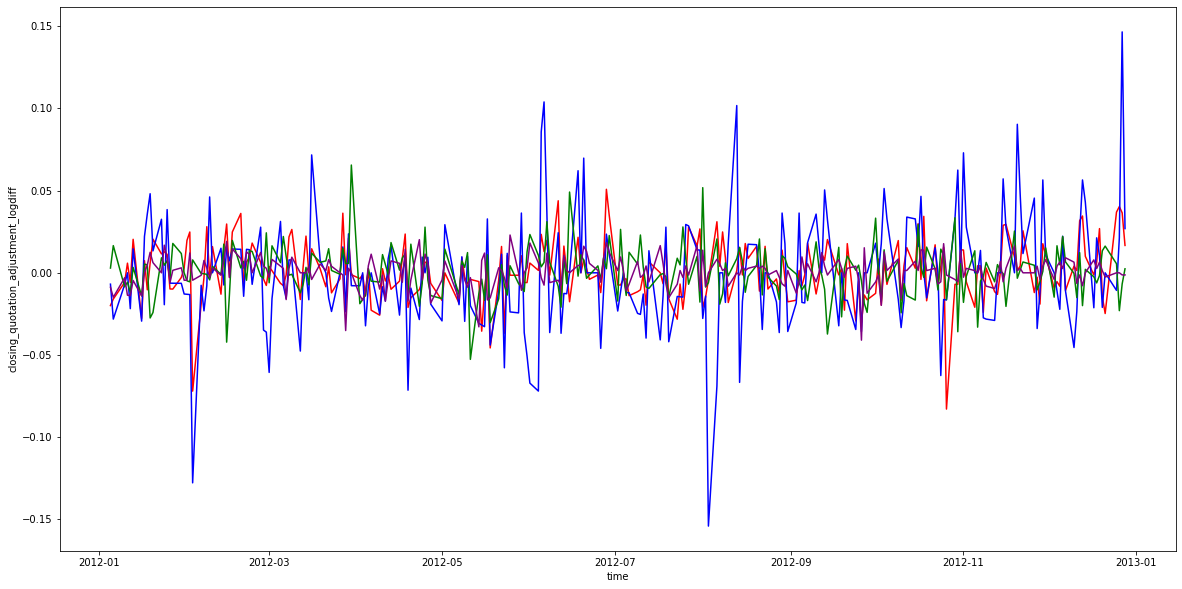

In [67]:
# 対数差収益率を使う
plt.figure(figsize=(20,10))
sns.lineplot(x='time', y='closing_quotation_adjustment_logdiff', data=yamaha, color='red')
sns.lineplot(x='time', y='closing_quotation_adjustment_logdiff', data=ita, color='blue')
sns.lineplot(x='time', y='closing_quotation_adjustment_logdiff', data=pola, color='green')
sns.lineplot(x='time', y='closing_quotation_adjustment_logdiff', data=takeda, color='purple')

## 自己相関
時間差を利用した自分自身との相関関係
## ラグ
ずらす時点の度合い、一つ前の時点だと１ラグ
## コレログラム
ラグ（横軸）と自己相関係数（縦軸）のグラフ
## 自己相関関係の有無の調べ方
LjungBox検定をする

## 定常性
下記の条件を満たす場合に定常性という
$$
\{R_1, R_2....R_n\}
$$
平均が一定である
$$
E(R_n) = a
$$
分散が一定である
$$
V(R_n)=0
$$
自己共分散がラグhだけに依存する
$$
Cov(R_h, R_{h+1} )
$$
## ホワイトノイズ
平均が０、分散が一定、自己共分散が０のもの
## 自己回帰モデル
切片μと自己回帰係数φ、εがホワイトノイズ
$$
R_t = μ+φ_1R_{t-1}+ε_t
$$
## 単位根